In [67]:
pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [68]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'pulsemcp_servers_all.csv'  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display basic statistics of the dataset
print("\nBasic Statistics:")
print(data.describe())

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")





First 5 rows of the dataset:
         owner                  repo  github_stars  download_count  \
0  021-factory  laravel-debugbar-mcp           1.0             NaN   
1     0xbeedao       mcp-taskwarrior           0.0          1194.0   
2      0xbruno               mcpexec           0.0             NaN   
3      0xdwong               sui-mcp           1.0             NaN   
4       0xgval         evm-mcp-tools           5.0             NaN   

               experimental_ai_generated_description  
0  Laravel DebugBar MCP Server provides a bridge ...  
1  mcp-taskwarrior is a server implementation by ...  
2  This MCP server implementation provides a tool...  
3  Sui MCP server enables AI assistants to intera...  
4  EVM MCP Tools provides Ethereum blockchain ana...  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3978 entries, 0 to 3977
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------             

In [ ]:
import io
#get top 5 rows after sorting by star 
top_5_stars = data.sort_values(by='github_stars', ascending=False).head(5)
top_5_downloads = data.sort_values(by='download_count', ascending=False).head(5)

#get random sample of 10 rows
random_sample = data.sample(n=10, random_state=42)
#combine top_5_stars, top_5_downloads, random_sample to a single csv file
combined_data = pd.concat([top_5_stars, top_5_downloads, random_sample])
# Save the combined data to a CSV file
combined_data.to_csv('good_sample.csv', index=False)

In [64]:

# Calculate statistics for numerical columns
stats = {}
numerical_columns = ['github_stars', 'download_count']

for column in numerical_columns:
    stats[column] = {
    'mean': data[column].mean(),
    'median': data[column].median(),
    'std_dev': data[column].std(),
    'mode': data[column].mode().iloc[0] if not data[column].mode().empty else None
}

    # Display the statistics
for col, stat in stats.items():
    print(f"Statistics for {col}:")
    for key, value in stat.items():
        print(f"  {key.capitalize()}: {value}")

Statistics for github_stars:
  Mean: 265.63662790697674
  Median: 3.0
  Std_dev: 2749.3542211202034
  Mode: 0.0
Statistics for download_count:
  Mean: 14633.842105263158
  Median: 1811.0
  Std_dev: 65357.50577628243
  Mode: 0.0


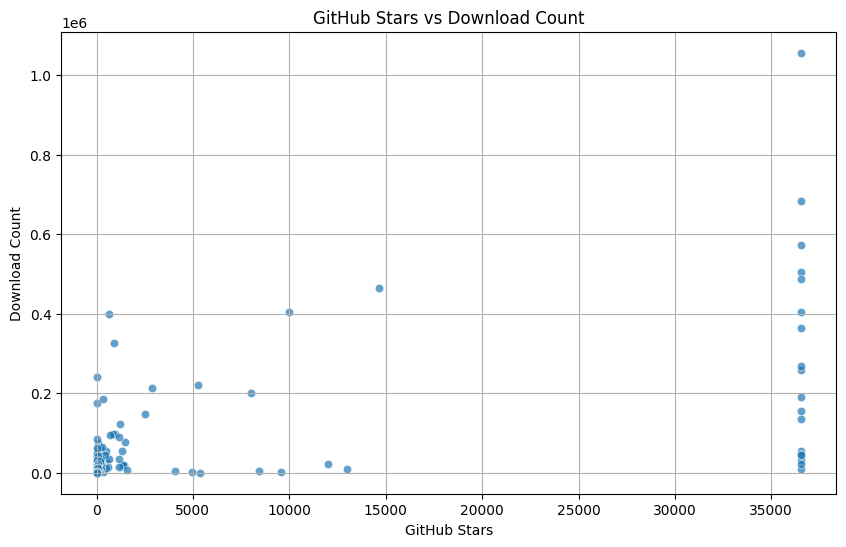

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='github_stars', y='download_count', alpha=0.7)
plt.title('GitHub Stars vs Download Count')
plt.xlabel('GitHub Stars')
plt.ylabel('Download Count')
plt.grid(True)
plt.show()

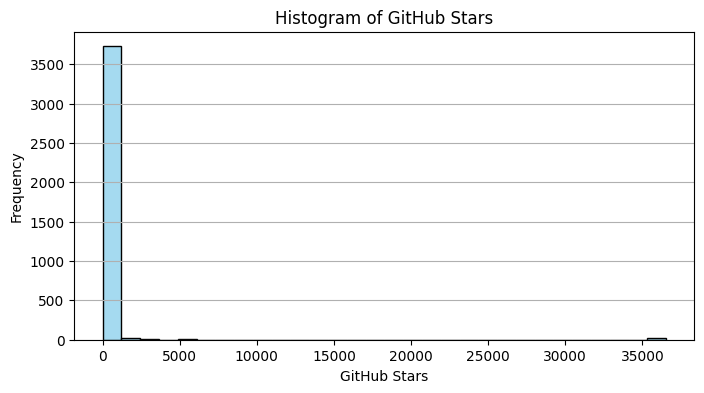

In [49]:
plt.figure(figsize=(8, 4))
sns.histplot(data['github_stars'], kde=False, bins=30, color='skyblue')
plt.title('Histogram of GitHub Stars')
plt.xlabel('GitHub Stars')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

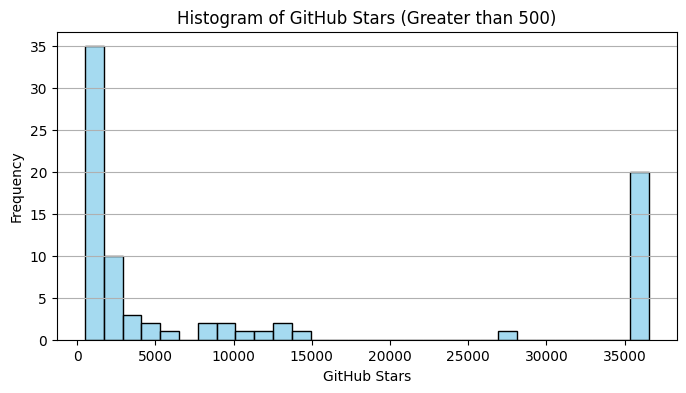

In [50]:
plt.figure(figsize=(8, 4))
sns.histplot(data[data['github_stars'] > 500]['github_stars'], kde=False, bins=30, color='skyblue')
plt.title('Histogram of GitHub Stars (Greater than 500)')
plt.xlabel('GitHub Stars')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

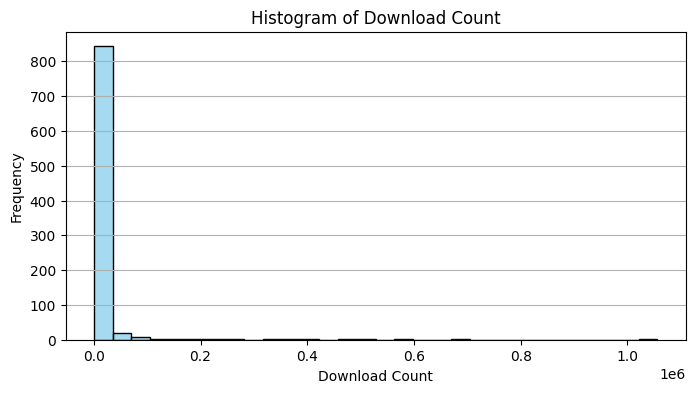

In [51]:
plt.figure(figsize=(8, 4))
sns.histplot(data['download_count'].dropna(), kde=False, bins=30, color='skyblue')
plt.title('Histogram of Download Count')
plt.xlabel('Download Count')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [66]:
filtered_data = data[(data['github_stars'] > 0) & (data['download_count'] > 0)]
filtered_data = filtered_data[filtered_data['github_stars'] > 500]
filtered_data = filtered_data[filtered_data['download_count'] > 1000]
print(filtered_data)

                   owner                   repo  github_stars  download_count  \
112             ahujasid            ableton-mcp        1337.0         16571.0   
113             ahujasid            blender-mcp        9998.0        403413.0   
233           anaisbetts          mcp-installer         957.0         97520.0   
257                  src                everart       36543.0         10029.0   
261                  src     sequentialthinking       36543.0        364831.0   
399     basicmachines-co           basic-memory         511.0         41653.0   
454            blazickjp       arxiv-mcp-server         866.0         98043.0   
543          smithery-ai           mcp-obsidian         686.0         94877.0   
635             packages          agent-toolkit        1407.0         19741.0   
641           cloudflare  mcp-server-cloudflare        1314.0         54926.0   
720                 libs             mcp-server        4070.0          3797.0   
857              dhravya    

In [62]:

# Calculate statistics for numerical columns
stats = {}
numerical_columns = ['github_stars', 'download_count']

# Ensure filtered_data is defined and use the correct column names
for column in numerical_columns:
    stats[column] = {
    'mean': filtered_data[column].mean(),
    'median': filtered_data[column].median(),
    'std_dev': filtered_data[column].std(),
    'mode': filtered_data[column].mode().iloc[0] if not filtered_data[column].mode().empty else None
}

    # Display the statistics
for col, stat in stats.items():
    print(f"Statistics for {col}:")
    for key, value in stat.items():
        print(f"  {key.capitalize()}: {value}")

Statistics for github_stars:
  Mean: 16131.0
  Median: 8036.0
  Std_dev: 16584.53346134388
  Mode: 36543.0
Statistics for download_count:
  Mean: 182107.78723404257
  Median: 94877.0
  Std_dev: 220439.46663504944
  Mode: 3797.0


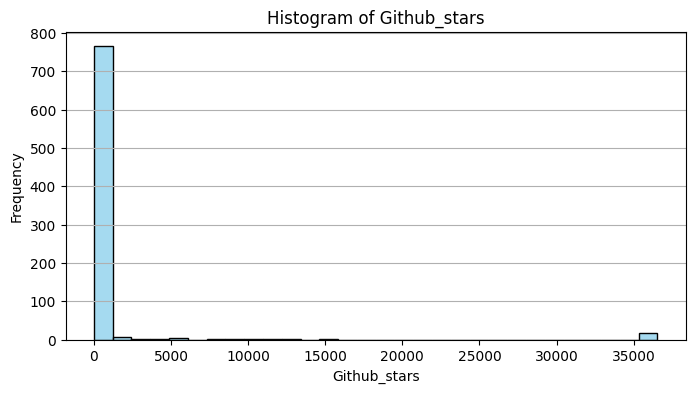

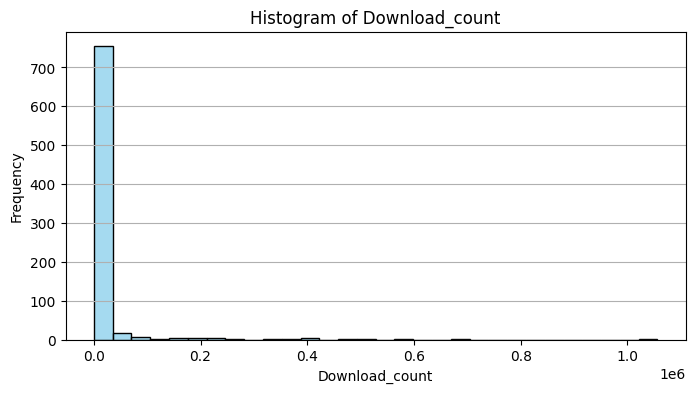

In [60]:
# Create histograms for numerical columns in filtered_data
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(filtered_data[column], kde=False, bins=30, color='skyblue')
    plt.title(f'Histogram of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()